In [54]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimension de X: (100, 2)
dimension de y: (100, 1)


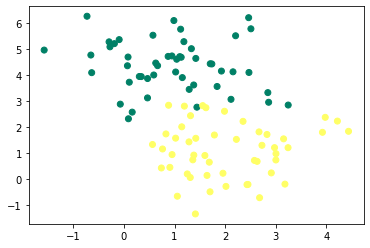

In [3]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimension de X:', X.shape)
print('dimension de y:', y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()

In [23]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    
    return(W, b)

In [24]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1+np.exp(-Z))
    return A

In [25]:
def log_loss(A, y):
    return -1/len(y) * np.sum(y * np.log(A) + (1-y)*np.log(1-A))

In [26]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [27]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [49]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

In [58]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    W, b = initialisation(X)
    Loss = []
    
    #Apprentissage - Back Propagration - Gradient Descent
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        
    #Evaluation
    y_pred = predict(X, W, b)
    
    print("Notre modèle à une précision de :", accuracy_score(y, y_pred))
    print("La fonction coût final vaut: ", Loss[-1])
    print("Les poids du neurones est W=", W, "et b =", b)
    
    return (W, b, Loss)

In [63]:
def affichage(X, y):
    W, b, Loss = artificial_neuron(X, y)
    
    plt.plot(Loss)
    plt.show()
    
    x_limit = np.linspace(-1, 4, num=1000)
    y_limit = -(W[0]*x_limit + b)/W[1]
    plt.plot(x_limit, y_limit, c='orange', lw=3)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
    
    new_plant = np.array([2, 1])
    plt.scatter(new_plant[0], new_plant[1], c='r')
    plt.show()
    print(predict(new_plant, W, b))

Notre modèle à une précision de : 0.92
La fonction coût final vaut:  0.20546676768838124
Les poids du neurones est W= [[ 0.98969246]
 [-1.1716977 ]] et b = [1.29710975]


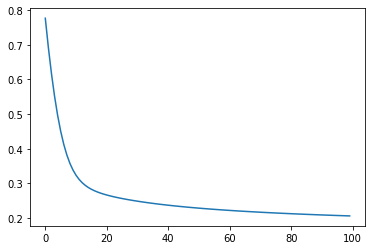

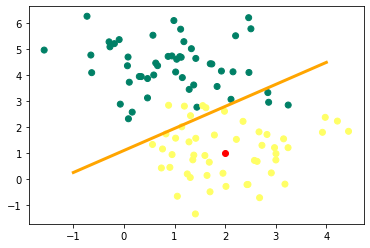

[ True]


In [64]:
affichage(X, y)

## Visualisation 3D avec plotly

In [68]:
import plotly.graph_objects as go

In [69]:
#Search for the new equivalent name of the module figure()
fig = go.figure(data=[go.Scatter3d(
    x=X[:, 0].flatten(),
    y=Y[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color = y.flatten(),
        colorscale= 'Yl6n',
        opacity=0.9,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = 'orthographic'
fig.show()

AttributeError: module 'plotly.graph_objects' has no attribute 'figure'

In [ ]:
X0 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
X1 = np.linspace(X[:,1].min(), X[:,1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] + xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = go.figure(data=[go.Surface(
    z = A,
    x = xx0,
    y = xx1,
    colorscale = 'Yl6n',
    opacity = 0.7,
    reversescale = True
)])

fig.add_scatter3d(
    x=X[:, 0].flatten(),
    y=Y[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color = y.flatten(),
        colorscale= 'Yl6n',
        opacity=0.9,
        reversescale=True
    )
)

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = 'orthographic'
plt.show()